# K-Means Clustering

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing the libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [9]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Clustering/Mall_Customers.csv')
X = dataset.iloc[:, [3,4]]

## Using the elbow method to find the optimal number of clusters

In [10]:
from sklearn.cluster import KMeans
wcss = []
k_clusters = range(1, 11)
for k in k_clusters:
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)


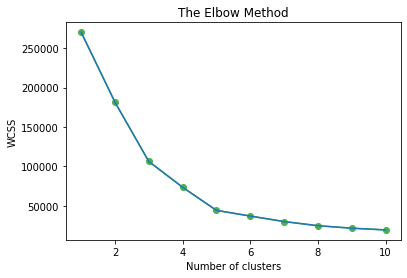

In [11]:
plt.plot(k_clusters, wcss, marker = 'o', c = '#4CAF50')
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [12]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

In [26]:
print(kmeans.labels_)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [14]:
print(kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]]


## Visualising the clusters

In [15]:
print(X)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


In [27]:
print(np.array(X)[kmeans.labels_ == 0, 0])

[31 50 27 29 31 49 33 31 59 50 47 51 69 27 53 70 19 67 54 63 18 43 68 19
 32 70 47 60 60 59 26 45 40 23 49 57 38 67 46 21 48 55 22 34 50 68 18 48
 40 32 24 47 27 48 20 23 49 67 26 49 21 66 54 68 66 65 19 38 19 18 19 63
 49 51 50 27 38 40 43 25 28]


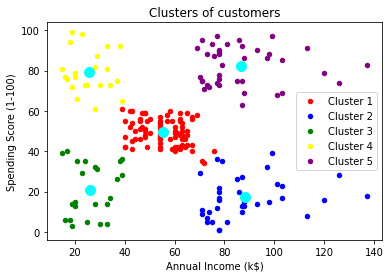

In [17]:
X = np.array(X)
plt.scatter(X[kmeans.labels_ == 0, 0], X[kmeans.labels_ == 0, 1], s=20, c='red', label='Cluster 1')
plt.scatter(X[kmeans.labels_ == 1, 0], X[kmeans.labels_ == 1, 1], s=20, c='blue', label='Cluster 2')
plt.scatter(X[kmeans.labels_  == 2, 0], X[kmeans.labels_ == 2, 1], s=20, c='green', label='Cluster 3')
plt.scatter(X[kmeans.labels_  == 3, 0], X[kmeans.labels_ == 3, 1], s=20, c='yellow', label='Cluster 4')
plt.scatter(X[kmeans.labels_  == 4, 0], X[kmeans.labels_ == 4, 1], s=20, c='purple', label='Cluster 5')
plt.legend()

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='cyan', label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [18]:
customers_set = np.array(dataset)
target_customers = customers_set[kmeans.labels_  == 4, :]
print(target_customers)

[[124 'Male' 39 69 91]
 [126 'Female' 31 70 77]
 [128 'Male' 40 71 95]
 [130 'Male' 38 71 75]
 [132 'Male' 39 71 75]
 [134 'Female' 31 72 71]
 [136 'Female' 29 73 88]
 [138 'Male' 32 73 73]
 [140 'Female' 35 74 72]
 [142 'Male' 32 75 93]
 [144 'Female' 32 76 87]
 [146 'Male' 28 77 97]
 [148 'Female' 32 77 74]
 [150 'Male' 34 78 90]
 [152 'Male' 39 78 88]
 [154 'Female' 38 78 76]
 [156 'Female' 27 78 89]
 [158 'Female' 30 78 78]
 [160 'Female' 30 78 73]
 [162 'Female' 29 79 83]
 [164 'Female' 31 81 93]
 [166 'Female' 36 85 75]
 [168 'Female' 33 86 95]
 [170 'Male' 32 87 63]
 [172 'Male' 28 87 75]
 [174 'Male' 36 87 92]
 [176 'Female' 30 88 86]
 [178 'Male' 27 88 69]
 [180 'Male' 35 93 90]
 [182 'Female' 32 97 86]
 [184 'Female' 29 98 88]
 [186 'Male' 30 99 97]
 [188 'Male' 28 101 68]
 [190 'Female' 36 103 85]
 [192 'Female' 32 103 69]
 [194 'Female' 38 113 91]
 [196 'Female' 35 120 79]
 [198 'Male' 32 126 74]
 [200 'Male' 30 137 83]]


## 3D Visualization

### Fitting the K-Means

In [19]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

### Plotting the result

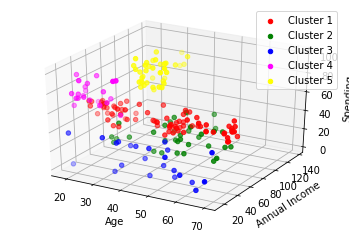

In [20]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
X = dataset.iloc[:, 2:].values

ax.scatter3D(X[kmeans.labels_ == 0, 0], X[kmeans.labels_ == 0, 1], X[kmeans.labels_ == 0, 2],
             s=20, c='red', label='Cluster 1')
ax.scatter3D(X[kmeans.labels_ == 1, 0], X[kmeans.labels_ == 1, 1], X[kmeans.labels_ == 1, 2],
             s=20, c='green', label='Cluster 2')
ax.scatter3D(X[kmeans.labels_ == 2, 0], X[kmeans.labels_ == 2, 1], X[kmeans.labels_ == 2, 2],
             s=20, c='blue', label='Cluster 3')
ax.scatter3D(X[kmeans.labels_ == 3, 0], X[kmeans.labels_ == 3, 1], X[kmeans.labels_ == 3, 2],
             s=20, c='magenta', label='Cluster 4')
ax.scatter3D(X[kmeans.labels_ == 4, 0], X[kmeans.labels_ == 4, 1], X[kmeans.labels_ == 4, 2],
             s=20, c='yellow', label='Cluster 5')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending');
plt.legend()
plt.show()
